# Boxing Bouts Logistic Regression.

## Importing and cleansing data

### Import modules

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Visualisation Settings

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rc("font", size=14)
sns.set(rc={'figure.figsize':(12,12)})
sns.set_style('whitegrid')
sns.set_palette('BuGn')

### Logistic Regression Assumptions

In [3]:
#  Binary logistic regression requires the dependent variable to be binary.
#  For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
#  Only the meaningful variables should be included.
#  The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
#  The independent variables are linearly related to the log odds.
#  Logistic regression requires quite large sample sizes.

### Data

In [4]:
data = pd.read_csv("/Users/danielcorcoran/PycharmProjects/daniels_mac_proj/datasets/for_testing/cleaned_bout.csv")

In [5]:
data.head(3)

,Unnamed: 0,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,...,kos_A,kos_B,result,decision,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
0,1,26.0,31.0,175.0,185.0,179.0,185.0,orthodox,orthodox,164.0,...,34,32.0,win_A,UD,120.0,108.0,120.0,108.0,120.0,108.0
1,3,25.0,29.0,175.0,174.0,179.0,180.0,orthodox,orthodox,155.0,...,32,19.0,win_A,KO,47.0,48.0,49.0,46.0,48.0,47.0
2,6,23.0,31.0,175.0,175.0,179.0,188.0,orthodox,orthodox,155.0,...,31,12.0,win_A,SD,115.0,113.0,117.0,111.0,113.0,115.0


In [6]:
data.shape

(2728, 27)

### I want to remove features which are recorded after the result of the bout

In [7]:
data = data.drop(
    [
        "Unnamed: 0", "judge1_A", "judge2_A", "judge3_A", "judge1_B",
        "judge2_B", "judge3_B", "decision"
    ],
    axis=1)

In [8]:
data.head(3)

,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,weight_B,won_A,won_B,lost_A,lost_B,drawn_A,drawn_B,kos_A,kos_B,result
0,26.0,31.0,175.0,185.0,179.0,185.0,orthodox,orthodox,164.0,164.0,48,50,1,2,1,1,34,32.0,win_A
1,25.0,29.0,175.0,174.0,179.0,180.0,orthodox,orthodox,155.0,155.0,46,31,1,3,1,0,32,19.0,win_A
2,23.0,31.0,175.0,175.0,179.0,188.0,orthodox,orthodox,155.0,155.0,43,19,1,1,1,2,31,12.0,win_A


In [9]:
data.shape

(2728, 19)

In [10]:
for column in data.columns:
    unique_values = data[column].value_counts().count()
    print(column,"has",unique_values,"unique values.")

age_A has 35 unique values.
age_B has 35 unique values.
height_A has 50 unique values.
height_B has 50 unique values.
reach_A has 58 unique values.
reach_B has 60 unique values.
stance_A has 2 unique values.
stance_B has 2 unique values.
weight_A has 162 unique values.
weight_B has 168 unique values.
won_A has 89 unique values.
won_B has 83 unique values.
lost_A has 23 unique values.
lost_B has 38 unique values.
drawn_A has 8 unique values.
drawn_B has 9 unique values.
kos_A has 66 unique values.
kos_B has 68 unique values.
result has 2 unique values.


### I want to create new custom columns i.e ratios/diffs

In [11]:
#first show the available columns
for column in data.columns:
    print(column)

age_A
age_B
height_A
height_B
reach_A
reach_B
stance_A
stance_B
weight_A
weight_B
won_A
won_B
lost_A
lost_B
drawn_A
drawn_B
kos_A
kos_B
result


In [12]:
age_diff = data["age_A"] - data["age_B"]
height_diff = data["height_A"] - data["height_B"]
reach_diff = data["reach_A"] - data["reach_B"]
weight_diff = data["weight_A"] - data["weight_B"]
kd_diff_A = data["won_A"] - data["lost_A"]
kd_diff_B = data["won_B"] - data["lost_B"]

In [13]:
data = pd.concat(
    [
        data,
        age_diff.rename("age_diff"),
        height_diff.rename("height_diff"),
        reach_diff.rename("reach_diff"),
        weight_diff.rename("weight_diff"),
        kd_diff_A.rename("kd_diff_A"),
        kd_diff_B.rename("kd_diff_B")
    ],
    
    axis=1)

### Check the concatenated data 

In [14]:
data.shape

(2728, 25)

In [15]:
data.head(3)

,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,weight_B,...,drawn_B,kos_A,kos_B,result,age_diff,height_diff,reach_diff,weight_diff,kd_diff_A,kd_diff_B
0,26.0,31.0,175.0,185.0,179.0,185.0,orthodox,orthodox,164.0,164.0,...,1,34,32.0,win_A,-5.0,-10.0,-6.0,0.0,47,48
1,25.0,29.0,175.0,174.0,179.0,180.0,orthodox,orthodox,155.0,155.0,...,0,32,19.0,win_A,-4.0,1.0,-1.0,0.0,45,28
2,23.0,31.0,175.0,175.0,179.0,188.0,orthodox,orthodox,155.0,155.0,...,2,31,12.0,win_A,-8.0,0.0,-9.0,0.0,42,18


### 'result' is the dependent variable, convert it to 0 and 1s 

In [16]:
data["result"] = data["result"].replace("win_A", 1)
data["result"] = data["result"].replace("win_B", 0)

In [17]:
data["result"].value_counts()

1    2315
0     413
Name: result, dtype: int64

## Meeting the assumptions of the model

### Meeting condition 1: No Nulls

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2728 entries, 0 to 2727
Data columns (total 25 columns):
age_A          2728 non-null float64
age_B          2728 non-null float64
height_A       2728 non-null float64
height_B       2728 non-null float64
reach_A        2728 non-null float64
reach_B        2728 non-null float64
stance_A       2728 non-null object
stance_B       2728 non-null object
weight_A       2728 non-null float64
weight_B       2728 non-null float64
won_A          2728 non-null int64
won_B          2728 non-null int64
lost_A         2728 non-null int64
lost_B         2728 non-null int64
drawn_A        2728 non-null int64
drawn_B        2728 non-null int64
kos_A          2728 non-null int64
kos_B          2728 non-null float64
result         2728 non-null int64
age_diff       2728 non-null float64
height_diff    2728 non-null float64
reach_diff     2728 non-null float64
weight_diff    2728 non-null float64
kd_diff_A      2728 non-null int64
kd_diff_B      2728 non-n

In [19]:
for column in data.columns:
    print(column,":","{:.2%}".format(1-(data[column].isnull().sum()/data.shape[0])))

age_A : 100.00%
age_B : 100.00%
height_A : 100.00%
height_B : 100.00%
reach_A : 100.00%
reach_B : 100.00%
stance_A : 100.00%
stance_B : 100.00%
weight_A : 100.00%
weight_B : 100.00%
won_A : 100.00%
won_B : 100.00%
lost_A : 100.00%
lost_B : 100.00%
drawn_A : 100.00%
drawn_B : 100.00%
kos_A : 100.00%
kos_B : 100.00%
result : 100.00%
age_diff : 100.00%
height_diff : 100.00%
reach_diff : 100.00%
weight_diff : 100.00%
kd_diff_A : 100.00%
kd_diff_B : 100.00%


### Meeting condition 2: Sufficient Records

In [20]:
data.shape[0]/data.shape[1]

109.12

In [21]:
# condition is 50 records per variable

### Meeting condition 3: Target is binary or ordinal

In [22]:
dependent_variable = "result"
data[dependent_variable].value_counts()

1    2315
0     413
Name: result, dtype: int64

In [23]:
# there are only 2 values in the target varible, target is binary.

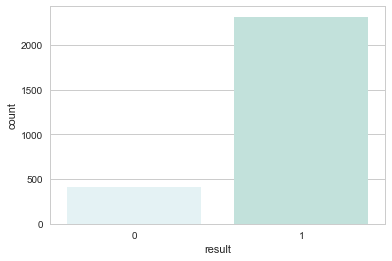

In [24]:
sns.countplot(data = data, x = dependent_variable)

### Meeting condition 4: Little to no multicollinearity

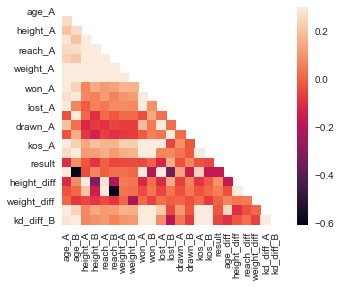

In [25]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr, mask = mask, vmax = 0.3, square = True)

## Data Manipulation

### Data Exploration

In [26]:
data.groupby(dependent_variable).mean()

,age_A,age_B,height_A,height_B,reach_A,reach_B,weight_A,weight_B,won_A,won_B,...,drawn_A,drawn_B,kos_A,kos_B,age_diff,height_diff,reach_diff,weight_diff,kd_diff_A,kd_diff_B
result,,,,,,,,,,,,,,,,,,,,,
0,28.755448,27.663438,175.549637,176.307506,180.319613,181.283293,154.728814,155.094431,26.859564,24.292978,...,0.573850,0.641646,17.602906,16.922518,1.092010,-0.757869,-0.963680,-0.365617,23.905569,21.653753
1,27.249244,28.960259,174.971922,174.104104,180.074730,179.255292,150.293737,150.644060,24.973218,24.199568,...,0.486393,0.860907,16.660043,15.485529,-1.711015,0.867819,0.819438,-0.350324,23.012959,19.408639


### Creating Dummy Variables

In [27]:
#converting categorical columns into binary columns

cat_vars = ["stance_A", "stance_B"]

for var in cat_vars:
    cat_list = 'var' + "_" + var
    cat_list = pd.get_dummies(data[var], prefix=var, drop_first=True)
    data1 = data.join(cat_list)
    data = data1

data_vars = data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [28]:
data_final = data[to_keep]
data_final.columns.values

array(['age_A', 'age_B', 'height_A', 'height_B', 'reach_A', 'reach_B',
       'weight_A', 'weight_B', 'won_A', 'won_B', 'lost_A', 'lost_B',
       'drawn_A', 'drawn_B', 'kos_A', 'kos_B', 'result', 'age_diff',
       'height_diff', 'reach_diff', 'weight_diff', 'kd_diff_A',
       'kd_diff_B', 'stance_A_southpaw', 'stance_B_southpaw'],
      dtype=object)

In [29]:
data_final.shape

(2728, 25)

In [30]:
data_final.head(3)

,age_A,age_B,height_A,height_B,reach_A,reach_B,weight_A,weight_B,won_A,won_B,...,kos_B,result,age_diff,height_diff,reach_diff,weight_diff,kd_diff_A,kd_diff_B,stance_A_southpaw,stance_B_southpaw
0,26.0,31.0,175.0,185.0,179.0,185.0,164.0,164.0,48,50,...,32.0,1,-5.0,-10.0,-6.0,0.0,47,48,0,0
1,25.0,29.0,175.0,174.0,179.0,180.0,155.0,155.0,46,31,...,19.0,1,-4.0,1.0,-1.0,0.0,45,28,0,0
2,23.0,31.0,175.0,175.0,179.0,188.0,155.0,155.0,43,19,...,12.0,1,-8.0,0.0,-9.0,0.0,42,18,0,0


### Export subset of data after creating dummy variables, to test model on later

In [31]:
boxing_last_x_records = data_final[2228:2728]

In [32]:
boxing_last_x_records.shape

(500, 25)

In [33]:
#export test data for later, this data has not been touched by the regression

boxing_last_x_records.to_csv("boxing_last_x_records.csv")

In [34]:
data_final.shape

(2728, 25)

In [35]:
data_final = data_final[0:2228]

In [36]:
data_final.shape

(2228, 25)

## Creating the Model

### Feature Selection (RFE) 

In [37]:
data_final_vars=data_final.columns.values.tolist()
y=[dependent_variable]
X=[i for i in data_final_vars if i not in y]

In [38]:
#using recursive feature elimination to remove irrelevant columns

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

features_to_keep = 12

rfe = RFE(logreg, features_to_keep) 
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False  True  True False False False False  True  True  True
  True  True False  True  True False False False False  True  True  True]
[ 9  8  5  1  1  6 10 12  3  1  1  1  1  1  2  1  1 11  7 13  4  1  1  1]


In [39]:
rfe_support_list = rfe.support_.tolist()
print(rfe_support_list)

[False, False, False, True, True, False, False, False, False, True, True, True, True, True, False, True, True, False, False, False, False, True, True, True]


### Collecting relevant columns

In [40]:
data_final_columns = data_final[X].columns.tolist()

for n in range(len(rfe_support_list)):

    print(str(rfe_support_list[n]) + " : " + data_final_columns[n])

False : age_A
False : age_B
False : height_A
True : height_B
True : reach_A
False : reach_B
False : weight_A
False : weight_B
False : won_A
True : won_B
True : lost_A
True : lost_B
True : drawn_A
True : drawn_B
False : kos_A
True : kos_B
True : age_diff
False : height_diff
False : reach_diff
False : weight_diff
False : kd_diff_A
True : kd_diff_B
True : stance_A_southpaw
True : stance_B_southpaw


In [41]:
relevant_columns = []
for n in range(len(rfe_support_list)):
    if rfe_support_list[n] == True:
        relevant_columns.append(data_final_columns[n])
relevant_columns

['height_B',
 'reach_A',
 'won_B',
 'lost_A',
 'lost_B',
 'drawn_A',
 'drawn_B',
 'kos_B',
 'age_diff',
 'kd_diff_B',
 'stance_A_southpaw',
 'stance_B_southpaw']

In [42]:
X = data_final[relevant_columns]
y = data_final[dependent_variable]

### Logistic Regression Model Fitting

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Show coefficients

In [44]:
for n in logreg.coef_.tolist():
    print(n)

[-0.026907131594570408, 0.02965530670846954, 0.07293576251518107, -0.09885390749492504, 0.10424850798319237, -0.028024100297096764, -0.03992409120896212, -0.0639861490523247, -0.022415465347209652, -0.031312745466804244, 0.015331346599411426, 0.015331346599411426]


#### Show intercept

In [45]:
logreg.intercept_

array([0.92428029])

#### Show independant variables

In [46]:
X.columns

Index(['height_B', 'reach_A', 'won_B', 'lost_A', 'lost_B', 'drawn_A',
       'drawn_B', 'kos_B', 'age_diff', 'kd_diff_B', 'stance_A_southpaw',
       'stance_B_southpaw'],
      dtype='object')

In [47]:
len(X.columns)

12

### Predicting test set results and calculating the accuracy

In [48]:
y_pred = logreg.predict(X_test)
print("Accuracy of logistic regression classifier on test set: {:.2%}".format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 83.48%


## Validating the Model

### Cross Validation

In [49]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: {:.2%}".format(results.mean()))

10-fold cross validation average accuracy: 84.02%


If the accuracy remains close to the accuracy of the logistic regression classifier on test set above the model 'generalizes well'

### Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix_ = confusion_matrix(y_test, y_pred)
print(confusion_matrix_)

[[  1 180]
 [  4 929]]


### Compute precision, recall, F-measure and support

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.20      0.01      0.01       181
          1       0.84      1.00      0.91       933

avg / total       0.73      0.83      0.76      1114



### ROC Curve

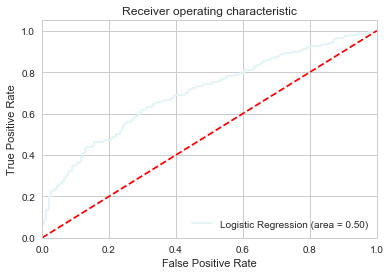

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
